## Exploring EMP metadata (QIIME mapping files) using Pandas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
from collections import defaultdict

In [9]:
pd.set_option("display.max_rows", 50)

In [3]:
# path to list of studies (ct112=all) and path to mapping files directory
path_studies = '/Users/luke/emp/metadata-refine/refine_emp_studies_ct112.txt'
path_mapping = '/Users/luke/emp/metadata-qiime-mapping'

### Explore metadata to identify changes needed

#### Function for merging mapping files and tallying column headers

In [4]:
def merge_and_tally_mapping_files(path_studies, path_mapping):
    studies = [line.rstrip('\n') for line in open(path_studies)]
    header_counts = defaultdict(int)
    df_merged = pd.DataFrame()
    for study in studies:
        path = '%s/%s_qiime_mapping.tsv' % (path_mapping, study)
        df_single = pd.read_csv(path, sep='\t', header=0, index_col=0, dtype=str)
        for header in df_single.columns:
            header_counts[header] += 1
        df_merged = df_merged.append(df_single, ignore_index=False, verify_integrity=True)
    return df_merged, header_counts

#### Function for displaying dataframe of a column header and its variants

In [5]:
# def header_variants(header, variants):
#     # column headers that might have useful salinity information
#     sal_variants = ['samp_salinity', 'seawater_or_pore_water_salinity', 'salinity_range', 'sediment_salinity', 'extreme_salinity', 'ppt_salinity']
#     # rows of mapping files that have values for any of above, plus 'salinity' column for reference
#     df_sal = df_merged[sal_variants].dropna(how='all')
#     df_sal = df_sal.join(df_merged['salinity'], how='inner')
#     return df_sal

#### Read mapping files, tally column headers, and merge into single dataframe

In [6]:
# main code to merge mapping files and count how often column headers appear
df_merged, header_counts = merge_and_tally_mapping_files(path_studies, path_mapping)

In [7]:
# change spaces in indexes to periods (for study 905)
df_merged.index = [re.sub(' ', '.', x) for x in df_merged.index]

In [8]:
# add study_id
df_merged['study_id'] = [re.split(r'\.', x)[0] for x in df_merged.index]

#### Investigating merged mapping df

In [10]:
df_merged.shape

(34007, 1808)

In [11]:
df_merged.dtypes

BarcodeSequence                     object
Description                         object
LinkerPrimerSequence                object
abandoned                           object
abietinella_abietina                object
activated_carbon                    object
active_layer_thickness              object
active_layer_thickness_units        object
actual_depth                        object
adult                               object
adult_diet                          object
afc_bacteria                        object
afc_coccolithopores                 object
afc_cryptophytes                    object
afc_large_picoeukaryotes            object
afc_nanoflagellates                 object
afc_small_picoeukaryotes            object
afc_synechoccus                     object
age                                 object
age_group                           object
age_in_years                        object
age_month_selective                 object
age_of_minerals_years               object
age_range  

In [12]:
# view every 1000th line
df_merged.iloc[np.arange(0, df_merged.shape[0], 1000)]

BarcodeSequence  \
550.L1S1.s.1.sequence                                 AACGCACGCTAG   
550.L3S342.s.3.sequence                               CACTCTGATTAG   
638.RMK.ENR.12.2                                      ATAGGCTGTAGT   
755.LSSF.BETA.D20.26.05.11.lane1.NoIndex.L001         CTCTCATATGCT   
809.PLRP13.35                                         ACATCTAGCAGA   
894.UY152.lane3.NoIndex.L003                          AACTTCACTTCC   
894.MR270.lane3.NoIndex.L003                          TGAGGTTTGATG   
933.BuN                                               CGATTAGGAATC   
945.P2.D4.lane2.NoIndex.L002                          GGCGAACTGAAG   
990.KA3U.B.18                                         GTCAACGCTGTC   
1030.TVF.2010.Loc1.D0.Rep3                            TCGACATCTCTT   
1064.G.CV341                                          GCGGAAACATGG   
1288.FBE06Nov07.McMahon.Pool.1.and.1percentPhiX...    TCTAACGAGTGC   
1288.TBE20Sept08.McMahon.Pool.2.and.1percentPhi...    CAACTGTCAGAC   
1521.Am3.s.7.1.sequences                              AGCGCTGATGTG   
1621.R8873                                            ACCGTGCTCACA   
1632.E1B09.Knight16sV4.JuannaBirdEMP.NoIndex.L0...    GATCTGCGATCC   
1674.McG.G110718Ha2                                   TAACGGCGCTCT   
1713.McG.L2K02                                        AGCACTTTGAGA   
1736.B23.0610                                         TATCGACACAAG   
1774.24BI22.10.09                                     TGTGCGATAACA   
1883.2009.087.Crump.Artic.LTREB.main.lane3.NoIndex    GTTTGGCCACAC   
1883.2007.239.Crump.Artic.LTREB.main.lane2.NoIndex    CTGTAGCTTGGC   
1883.2010.302A.Crump.Artic.LTREB.main.lane3.NoI...    TTATGTACGGCG   
1883.2007.495.Crump.Artic.LTREB.main.lane2.NoIndex    TCCTTAGAAGGC   
2192.H01a.Kitchen.Counter.169.lane2.NoIndex.L002      GGAATTATCGGT   
2192.H01a.Foot.233.lane2.NoIndex.L002                 AGGTGAGTTCTA   
2229.S2.N2.6.HP4.Thomas.CMB.Seaweed.lane6.NoInd...    TGTCGCAAATAG   
2300.BB.4064.colon                                    GATATACCAGTG   
10156.BCWL1.3                                         CCTTCAATGGGA   
10247.UT555                                           CACGATGGTCAT   
10308.Fh.J3.IFM.A.7                                   CATTCAGTTATA   
10323.K08G03.F.0811A                                  ACTCGGCCAACT   
10346.HW9A.Jul                                        GTGCTGCGCTTA   
10363.AC9                                             AACCGATGTACC   

                                                                                          Description  \
550.L1S1.s.1.sequence                                                                  sample_1 stool   
550.L3S342.s.3.sequence                                                             sample_1001 sebum   
638.RMK.ENR.12.2                                    RMK.ENR.12.2 5-20 mL enrichment culture on 0.4...   
755.LSSF.BETA.D20.26.05.11.lane1.NoIndex.L001       samples of sand from labscale_slow_sand filter...   
809.PLRP13.35                                       Microbialite collected from 35 feet depth in P...   
894.UY152.lane3.NoIndex.L003                                                        Sambar deer feces   
894.MR270.lane3.NoIndex.L003                                                              Goose feces   
933.BuN                                             DNA  from  surface  of  healthy  Delisea  pulc...   
945.P2.D4.lane2.NoIndex.L002                                     freshwater metagenome, Lake Stechlin   
990.KA3U.B.18                                       Block_3_Unfertilized_station_B_position_18 KA3...   
1030.TVF.2010.Loc1.D0.Rep3                          Tanana Valley Forest Fire year 2010 Organic la...   
1064.G.CV341                                               Whole intestine tissue, with food content.   
1288.FBE06Nov07.McMahon.Pool.1.and.1percentPhiX...                   freshwater metagenome FBE06Nov07   
1288.TBE20Sept08.McMahon.Pool.2.and.1percentPhi...          

In [13]:
# view the value counts for a given column
df_merged['env_matter'].value_counts()

ENVO:fresh water                  5837
ENVO:feces                        5312
ENVO:organic material             4157
ENVO:soil                         4107
ENVO:sebum                        2393
ENVO:egg                          1179
ENVO:sand                         1042
ENVO:mucus                         973
ENVO:ocean water                   911
ENVO:sea water                     783
ENVO:saliva                        763
ENVO:biofilm                       708
ENVO:dust                          689
ENVO:sterile water                 548
ENVO:marine sediment               518
ENVO:excreta                       517
ENVO:organic material feature      486
ENVO:rhizosphere                   477
ENVO:microbial mat                 442
ENVO:lake sediment                 403
ENVO:bodily fluid                  366
ENVO:sediment                      227
ENVO:peat soil                     216
ENVO:bulk soil                     164
ENVO:underground water             124
                         

#### Metadata column headers most frequently used

In [14]:
header_counts_keys = header_counts.keys()
header_counts_values = header_counts.values()

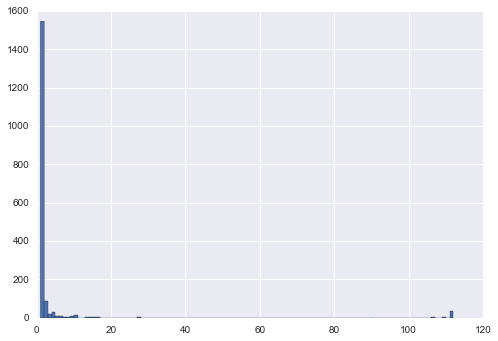

In [15]:
# display histogram of header counts - most headers are found in one study, some in two, some in all
x = plt.hist(header_counts_values, bins=max(header_counts_values)-1)

In [16]:
# make list of column headers found in all studies
isect_cols = []
max_header_count = max(header_counts_values)
for header in header_counts:
    if header_counts[header] == max_header_count:
        isect_cols.append(header)
isect_cols.sort()

In [17]:
# display column headers found in all studies (we lose a bunch that aren't in 1039_sample_template_from_gail_fixed.txt)
isect_cols

['BarcodeSequence',
 'LinkerPrimerSequence',
 'country',
 'dna_extracted',
 'env_biome',
 'env_feature',
 'env_matter',
 'experiment_design_description',
 'host_subject_id',
 'latitude',
 'library_construction_protocol',
 'linker',
 'longitude',
 'physical_specimen_remaining',
 'platform',
 'run_center',
 'run_date',
 'samp_size',
 'sample_type',
 'sequencing_meth',
 'target_gene',
 'target_subfragment',
 'taxon_id',
 'title']

#### Generating condensed/merged mapping files...

#### ...for Catherine to view in Excel 2016-01-12

In [18]:
select_cols = [
    'Description',
    'country',
    'env_biome',
    'env_feature',
    'env_matter',
    'experiment_design_description',
    'host_subject_id',
    'latitude',
    'longitude',
    'samp_size',
    'sample_type',
    'taxon_id',
    'title']

In [19]:
foruniq_cols = [
    'country',
    'env_biome',
    'env_feature',
    'env_matter',
    'latitude',
    'longitude',
    'samp_size',
    'sample_type',
    'taxon_id',
    'title']

In [20]:
df_isect = df_merged[isect_cols]
df_select = df_merged[select_cols]
df_foruniq_unique = df_merged[foruniq_cols].drop_duplicates()

#### ...for Luke to assign EMPO sample type 2016-03-23

In [21]:
sampletype_cols = [
    'study_id',
    'env_biome',
    'env_feature',
    'env_matter',
    'sample_type']

In [22]:
df_sampletype_unique = df_merged[sampletype_cols].drop_duplicates()

In [24]:
df_sampletype_unique.to_csv('/Users/luke/emp/metadata-refine/emp_qiime_mapping_sampletype_unique.tsv', sep='\t')

#### ...and now add EMPO columns to merged all columns and select columns (and covert indexes to lowercase to match biom)

In [22]:
df_empo = pd.read_excel('/Users/luke/emp/metadata-refine/emp_qiime_mapping_sampletype_unique_empo.xlsx', index_col=0)

In [23]:
df_union_empo = pd.merge(df_merged, df_empo, how='left', left_on=sampletype_cols, right_on=sampletype_cols)
df_union_empo.index = [x.lower() for x in df_merged.index]
df_select_empo = pd.merge(df_select, df_empo, how='left', left_on=sampletype_cols, right_on=sampletype_cols)
df_select_empo.index = [x.lower() for x in df_select.index]

#### Run date to determine whether old (pre-2015) or new (most of 2015) primers were used

If sample was run before 2015, PCR must have been too, and that means old primers were used. If sample was run in 2015 or later, must check with Greg.

Lots of errors in:
* `run_date`
* `library_construction_protocol`
* `experiment_design_description`

In [24]:
df_merged['run_date'].value_counts()

unknown      4123
2/1/14       3315
6/27/13      2337
2012         1999
8/27/10      1969
2013         1870
3/1/14       1737
12/17/12     1624
3/10/11      1506
8/28/12      1281
10/21/14     1014
2/15/12       940
5/20/11       750
5/22/12       552
2/15/13       477
6/2/11        471
6/21/11       467
2011          453
2/17/15       384
2/19/15       384
2/14/12       369
8/14/12       362
4/23/13       337
6/29/15       332
4/15/14       288
11/3/10       278
8/8/12        235
3/4/13        215
10/13/09      196
1/15/15       192
12/18/12      192
4/18/14       192
2/3/15        192
1/30/12       173
10/28/13      169
2/14/14       167
10/2/13       152
9/10/14       128
10/25/12      114
12/7/2012      96
3/8/13         96
5/28/11        95
10/9/12        93
2/25/13        92
9/3/15         64
8/22/12        64
2/12/12        61
8/13/08        60
12/1/12        59
8/1/12         27
9/1/11         13
3/5/17          1
3/5/18          1
3/5/16          1
12/31/15        1
7/11/16   

In [25]:
df_merged['title'].value_counts()

Crump_Arctic_LTREB_main                                                                                                                             3315
Catchment_sources_of_microbes                                                                                                                       2015
Moving pictures of the human microbiome                                                                                                             1969
Gilbert_house_forensics_BE                                                                                                                          1625
Temperate Bog Lakes                                                                                                                                 1506
The Global Sponge Microbiome: Diversity and structure of symbiont  communities across the phylum Porifera - final                                   1409
Thomas_CMB_Australian_seaweed                                                     

In [26]:
df_merged['library_construction_protocol'].value_counts()

This analysis was done as in Caporaso et al 2011 Genome research. The PCR primers (F515/R806) were developed against the V4 region of the 16S rRNA (both bacteria and archaea), which we determined would yield optimal community clustering with reads of this length using a procedure similar to that of ref. 15. [For reference, this primer pair amplifies the region 533_786 in the Escherichia coli strain 83972 sequence (greengenes accession no. prokMSA_id:470367).] The reverse PCR primer is barcoded with a 12-base error-correcting Golay code to facilitate multiplexing of up to Ê1,500 samples per lane, and both PCR primers contain sequencer adapter regions.                                                                                                                                                                                                                                                                                                                                                      

In [27]:
df_merged['experiment_design_description'].value_counts()

A 12-year sample archive of DNA from Alaskan arctic tundra ecosystems are available to the Earth Microbiome Project for comparison of microbial diversity across a range of arctic environments from soils to water to sediments. These samples were preserved and extracted using a method that differs from that of the EMP. Therefore, we must test how the extraction method used to extract our archived samples compares with those methods used by the EMP. The samples for this test were collected during the summer of 2011 at the Toolik Field Station. Each site was sampled in triplicate and samples were divided and preserved for extraction using our standard protocol (three replicates), and for extraction using the EMP protocol (three replicates). Half of the samples are from the epilimnion and hypolimnion of ultra-oligotrophic Toolik Lake collected over the course of the summer, and the rest are from different environments associated with a headwater stream that lies upslope of Toolik Lake. The 

#### Metadata column headers most frequently used (cont.)

In [28]:
# display column header counts from least to most common, found in >1 study
for header in sorted(header_counts, key=header_counts.get):
    if header_counts[header] > 1:
        print '%s: %s' % (header, header_counts[header])

collection_date: 2
microbial_biomass: 2
barium: 2
methane: 2
boron: 2
previous_land_use: 2
oxygen: 2
pcr_primer_name: 2
carbon_perc: 2
fledging_date: 2
distance: 2
iron: 2
phase: 2
electrical_conductivity: 2
genus: 2
replicate: 2
tank: 2
nitrogen_perc: 2
smoker: 2
redox_potential: 2
wind_speed: 2
water_content: 2
conductivity_meth: 2
days_since_epoch: 2
core: 2
microbial_biomass_unit: 2
host_order: 2
tot_depth_water_col: 2
laying_date: 2
enterococcus_density: 2
vineyard: 2
hydrogen: 2
clone: 2
bird_order: 2
hatching_date: 2
primary_prod: 2
district: 2
season: 2
water_content_soil_unit: 2
slope_gradient: 2
mesophiles_density: 2
fecal_preservation_method: 2
zinc: 2
chronic_condition: 2
family: 2
disease_stat: 2
microbial_biomass_meth: 2
sieving: 2
bird_family: 2
pregnant: 2
biological_specimen: 2
perturbation: 2
temperature: 2
crop: 2
broken_eggs: 2
org_carb: 2
salinity_unit: 2
village: 2
organism_count: 2
staphylococcus_density: 2
tot_phos: 2
hours_from_collection: 2
enterobacteriaceae_

#### Metadata columns of interest based on tally and hypothesized effect

These column headers are (1) found in all studies and (2) hypothesized to correlate with community composition:

* env_matter
* env_biome
* env_feature
* taxon_id
* altitude
* depth
* latitude
* longitude

These column headers are (1) not found in all studies *as named* (check for alternate spellings) but (2) hypothesized to correlate with community composition:

* ph
* salinity
* temperature
* phosphate (and other P species)
* nitrate (and other N species)
* carbon (various)

*SUGGESTED NEW METADATA RULES BASED ON OBSERVATIONS:*
* *ALL HEADERS MUST CONTAIN FULL DESCRIPTION -- NO ABBREVIATIONS*
* *ALL HEADERS MUST CONTAIN UNITS, e.g. temperature_degrees_celcius or nitrate_micromolar*

In [29]:
# lists are derived from computations above
headers_of_interest_all = ['env_biome',
                           'env_feature',
                           'env_matter',
                           'taxon_id',
                           'altitude',
                           'depth',
                           'latitude',
                           'longitude']
headers_of_interest_some = ['ph',
                            'salinity',
                            'temperature']

In [30]:
# display column header counts for headers of interest found in all studies (sanity check)
for header in headers_of_interest_all:
    print '%s: %s' % (header, header_counts[header])

env_biome: 112
env_feature: 112
env_matter: 112
taxon_id: 112
altitude: 111
depth: 109
latitude: 112
longitude: 112


In [31]:
# display column header counts for headers of interest not found in all studies
for header in headers_of_interest_some:
    print '%s: %s' % (header, header_counts[header])

ph: 40
salinity: 13
temperature: 2


#### Check the list of taxon_id (and look up taxonomy from ncbi) for each env_matter

#### Jaccard similarity of samples based on column headers (presence/absence) [Jon]

#### Check for alternate header names: ph, salinity, temperature, phosphate, nitrate, altitude, ...

* First use regular expressions and visual inspection to find headers likely to represent same metadata category
* Then look at the values: side by side if columns are in same sample, or using value counts and histograms if overlap between headers within samples is low

Functions used:

* check_two_columns -- check if two columns are equivalent to some level of precision
* check_in_range -- check if values in one column are within a given range (e.g. ph between 0-14)
* range_to_midpoint -- take two values with dash between them and return mean

### Columns for final refined mapping file -- changes made in emp20k_metadata_refine notebook

#### host_subject_id

In [32]:
df_merged['host_subject_id'].value_counts(dropna=False)

XXQIITAXX                                    6673
NaN                                          1470
M3                                           1458
Fundulus heteroclitus                         788
F4                                            534
HS10                                          189
Fundulus majalis                              127
Fundulus diaphanus                            115
HS7                                            95
HS1                                            95
HS8                                            93
HS9                                            85
Person_05.2                                    78
Person_05.1                                    78
HS5                                            75
HS4                                            67
Person_07.1                                    57
Person_07.2                                    57
Rattus Norvegicus 1                            50
Pigeon 1                                       48


**taxon_id**

In [33]:
df_merged['taxon_id'].value_counts(dropna=False)

449393      5749
410658      4129
749906      4079
539655      1887
718308      1748
410656      1710
408172      1453
1300146     1388
1163772     1264
1602388      873
506599       826
408170       733
447426       714
1256227      690
412755       637
408169       596
556182       571
939928       486
496924       453
527640       444
1131769      319
1297885      290
1561972      286
1118232      248
1338477      210
540485       198
1325974      192
1234904      190
410658.0     179
1441288      167
1441287      157
1213622      155
410661       114
410659        97
412757        93
655179        89
749907        79
1214127       72
652676        67
496922        59
1427740       50
1115523       49
646099        41
1082480       35
1649191       31
717931        22
1306859       21
410657        18
433727        14
1227552       12
904678         8
938273         5
55497          3
408196         2
452919         2
412758         1
412762         1
412760         1
Name: taxon_id

Rare values
* 410659 -- mine drainage metagenome (extraction and purification controls -- not sure why they picked this one)
* 749906 -- gut metagenome

In [34]:
df_merged.index[df_merged['taxon_id'] == '410659']
df_merged.index[df_merged['taxon_id'] == '749906']

Index([u'894.YY997.lane5.NoIndex.L005', u'894.YY996.lane5.NoIndex.L005',
       u'894.YY995.lane5.NoIndex.L005', u'894.YY994.lane5.NoIndex.L005',
       u'894.YY993.lane5.NoIndex.L005', u'894.YY992.lane5.NoIndex.L005',
       u'894.YY991.lane5.NoIndex.L005', u'894.YY990.lane5.NoIndex.L005',
       u'894.YY989.lane5.NoIndex.L005', u'894.YY988.lane5.NoIndex.L005',
       ...
       u'10323.Y60G05.F.0512B', u'10323.Y60G05.F.0611A',
       u'10323.Y60G05.F.0612A', u'10323.Y60G05.F.0711A',
       u'10323.Y60G05.F.0811A', u'10323.Y60G05.F.0811B',
       u'10323.Y60G05.F.0911A', u'10323.Y60G05.F.0911B',
       u'10323.Y60G05.F.1111A', u'10323.Y62B03.F.0911A'],
      dtype='object', length=4079)

**scientific_name**

In [35]:
df_merged['scientific_name'].value_counts(dropna=False)

NaN                                    27925
sponge metagenome                       1168
killifish                               1030
marine metagenome                        783
Nanger granti                            766
Mus musculus                             409
soil metagenome                          370
wetland metagenome                       216
unclassified metagenome                  197
wetland soil                             192
seawater metagenome                      156
soil                                     128
Protium subserratum                      120
beach sand metagenome                     96
Mycale grandis                            96
mus musculus                              84
Porites Asteroides                        55
sediment metagenome                       48
marine sediment metagenome                43
estuary metagenome                        31
freshwater metagenome                     12
metagenomes                                6
Sturnira l

#### study_id

In [36]:
[re.split(r'\.', x)[0] for x in df_merged.index]

['550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',
 '550',


#### country

In [37]:
df_merged['country_refined'] = df_merged['country']
# fix misspellings
df_merged['country_refined'][df_merged['country'] == 'USA'] = 'GAZ:United States of America'
df_merged['country_refined'][df_merged['country'] == 'GAZ:USA'] = 'GAZ:United States of America'
df_merged['country_refined'][df_merged['country'] == 'GAZ: United states of america'] = 'GAZ:United States of America'
df_merged['country_refined'][df_merged['country'] == 'GAZ:United Staates of America'] = 'GAZ:United States of America'
df_merged['country_refined'][df_merged['country'] == 'Kenya'] = 'GAZ:Kenya'
df_merged['country_refined'][df_merged['country'] == 'Canada'] = 'GAZ:Canada'
df_merged['country_refined'][df_merged['country'] == 'GAZ:Arctic ocean'] = 'GAZ:Arctic Ocean'
df_merged['country_refined'][df_merged['country'] == 'GAZ:russia'] = 'GAZ:Russia'
df_merged['country_refined'][df_merged['country'] == 'GAZ:Commonwealth of Puerto Rico'] = 'GAZ:Puerto Rico'

In [38]:
df_merged['country_refined'].value_counts(dropna=False)

GAZ:United States of America    17029
GAZ:Australia                    4381
GAZ:Germany                      1912
GAZ:Spain                        1519
GAZ:Puerto Rico                  1118
GAZ:Scotland                     1014
GAZ:Kenya                         902
GAZ:South Africa                  642
GAZ:Japan                         640
GAZ:Norway                        360
GAZ:Venezuela                     336
GAZ:Canada                        300
GAZ:England                       278
GAZ:Antarctica                    273
GAZ:Italy                         245
GAZ:Panama                        234
GAZ:Mongolia                      230
GAZ:Wales                         216
GAZ:Costa Rica                    192
GAZ:Brazil                        188
GAZ:English Channel               156
GAZ:Russia                        150
GAZ:Tanzania                      146
GAZ:Sweden                        143
GAZ:Arctic Ocean                  130
GAZ:Peru                          128
GAZ:China   

**latitude, longitude**

In [39]:
df_merged['latitude_refined'] = df_merged['latitude']
df_merged['longitude_refined'] = df_merged['longitude']
# change 0.0 to NaN (studies 1197, 1526, 1632, 1665, 1734, 1883)
df_merged['latitude_refined'][df_merged['latitude'] == '0.0'] = np.nan
df_merged['longitude_refined'][df_merged['longitude'] == '0.0'] = np.nan
# change 9999.0 to NaN (study 10156)
df_merged['latitude_refined'][df_merged['latitude'] == '9999.0'] = np.nan
df_merged['longitude_refined'][df_merged['longitude'] == '9999.0'] = np.nan
# divide by 100 for value > 10000 (study 933) -- Gail will fix in Qiita
for index, value in df_merged['longitude'].iteritems():
    if float(value) > 10000:
        df_merged['longitude_refined'][index] = str(float(value)*0.01)

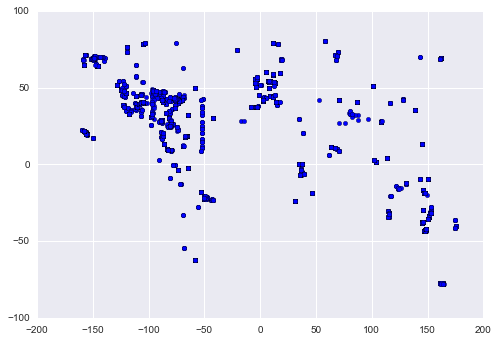

In [40]:
plt.scatter([float(x) for x in df_merged['longitude_refined']], [float(y) for y in df_merged['latitude_refined']])

**depth, altitude, elevation**

* depth	{value} m	Depth in meters of sample below surface (earth surface if soil, sea/lake bottom if sediment, lake surface if lake, sea level if marine). Generally zero if ground level. Either depth or altitude can have a non-zero value but not both.
* altitude	{value} m	Height above surface, usually zero unless the mouse is floating in the air. Either depth or altitude can have a non-zero value but not both.
* elevation	{value} m	Height above sea level in meters (use georeferencing tool).

Issues:
* Mix of floats, ints, and strings (e.g. a range), and depths have too many decimal places
* If contains a '-', assume range and change to int(midpoint)
* Remaining should be floats or ints
* round to 1. using `str(int(round(x, 0)))` and save new column as depth_round_ones
* round to 10. using `str(int(round(x, -1)))` and save new column as depth_round_tens

In [41]:
df_merged['elevation'].value_counts(dropna=False)

0               5826
1624.1          2458
181.32          1631
256.05          1506
88.35            798
822.97           768
719.0            719
226              709
300              643
60.0             640
1624             552
329.4906         467
3                450
7.79             443
43.1             391
180              374
744.0            359
183.0036         348
1105.0           342
246.4419         341
18.57            318
92.58            296
140              295
32               286
0.63             268
78.28            260
176              233
754.0            227
2208.89          225
0.0              220
475              216
58.45            212
259.3416         206
152.4488         203
1403.74          192
6                186
120.163          184
728.0            169
808.0            156
-0.2             156
454.38           156
1492.95          150
1427.1875        142
193              139
785.0            131
400-600          128
212.67           127
104          

#### env_biome, env_feature, env_material

Incorporate changes identified by Catherine Chu 
<https://docs.google.com/spreadsheets/d/1Xqmelnbx5PahFh4PoWEOo4zup9qwg52GR82Jrj313Os/edit?usp=sharing>

In [42]:
df_merged['env_biome'].value_counts(dropna=False)

ENVO:urban biome                                            8229
ENVO:small lake biome                                       3780
ENVO:marine biome                                           2990
ENVO:large river biome                                      2136
ENVO:freshwater biome                                       1736
ENVO:cropland biome                                         1410
ENVO:ocean biome                                            1402
ENVO:large lake biome                                       1196
ENVO:rangeland biome                                        1141
ENVO:estuarine biome                                        1117
ENVO:tropical grassland biome                                772
ENVO:cropland                                                750
ENVO:oceanic pelagic zone biome                              715
ENVO:tundra biome                                            696
ENVO:aquatic biome                                           664
ENVO:village biome       

In [43]:
# "ENVO:polar biome" needs to be reassigned to several others
df_merged[df_merged['env_biome'] == 'ENVO:polar biome'][['env_biome', 'env_feature', 'env_matter', 'sample_type']]

env_biome  \
723.C1.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C1.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C1.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C2.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C2.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C2.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C3.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C3.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C3.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C4.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C4.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C4.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C5.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C5.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C5.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C6.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C6.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C6.10m.G3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.5m.L3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R...  ENVO:polar biome   
723.C7.10m.L3.Catlin1.16Spool.110602.HWI.EAS137...  ENVO:polar biome   
723.C7.10m.G3.Catlin1.16Spo

In [44]:
# "ENVO:temperate broadleaf and mixed forest biome" needs to be reassigned to several others
df_merged[df_merged['env_biome'] == 'ENVO:temperate broadleaf and mixed forest biome'][['env_biome', 'env_feature', 'env_matter', 'sample_type']]

env_biome  \
632.Boreal.coniferous.forest    ENVO:temperate broadleaf and mixed forest biome   
632.Tar.sand.1                  ENVO:temperate broadleaf and mixed forest biome   
632.Tar.sand.2                  ENVO:temperate broadleaf and mixed forest biome   
632.Temperate.deciduous.forest  ENVO:temperate broadleaf and mixed forest biome   
632.Temperate.rain.forest       ENVO:temperate broadleaf and mixed forest biome   
1521.BZ1.s.6.1.sequences        ENVO:temperate broadleaf and mixed forest biome   

                                               env_feature env_matter  \
632.Boreal.coniferous.forest              ENVO:forest soil  ENVO:soil   
632.Tar.sand.1                  ENVO:oil contaminated soil  ENVO:soil   
632.Tar.sand.2                  ENVO:oil contaminated soil  ENVO:soil   
632.Temperate.deciduous.forest            ENVO:forest soil  ENVO:soil   
632.Temperate.rain.forest                 ENVO:forest soil  ENVO:soil   
1521.BZ1.s.6.1.sequences                  ENVO:forest soil  ENVO:soil   

                               sample_type  
632.Boreal.coniferous.forest          Soil  
632.Tar.sand.1                        Soil  
632.Tar.sand.2                        Soil  
632.Temperate.deciduous.forest        Soil  
632.Temperate.rain.forest             Soil  
1521.BZ1.s.6.1.sequences         XXQIITAXX

In [45]:
# "ENVO:temperate grasslands, savannas, and shrubland biome" needs to be reassigned to several others
df_merged[df_merged['env_biome'] == 'ENVO:temperate grasslands, savannas, and shrubland biome'][['env_biome', 'env_feature', 'env_matter', 'sample_type']]

env_biome  \
632.Compost          ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF1.OM2C0.MIN  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF1.OM2C0.ORG  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF1.REF.MIN    ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF1.REF.ORG    ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF2.OM2C0.MIN  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF2.OM2C0.ORG  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF2.REF.MIN    ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF2.REF.ORG    ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF3.OM2C0.MIN  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF3.OM2C0.ORG  ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF3.REF.MIN    ENVO:temperate grasslands, savannas, and shrub...   
1037.IDF3.REF.ORG    ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS2.OM2C0.MIN  ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS2.OM2C0.ORG  ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS2.REF.MIN    ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS2.REF.ORG    ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS3.OM2C0.MIN  ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS3.OM2C0.ORG  ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS3.REF.MIN    ENVO:temperate grasslands, savannas, and shrub...   
1037.SBS3.REF.ORG    ENVO:temperate grasslands, savannas, and shrub...   

                           env_feature env_matter sample_type  
632.Compost          ENVO:compost soil  ENVO:soil        Soil  
1037.IDF1.OM2C0.MIN       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF1.OM2C0.ORG       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF1.REF.MIN         ENVO:luvisol  ENVO:soil        Soil  
1037.IDF1.REF.ORG         ENVO:luvisol  ENVO:soil        Soil  
1037.IDF2.OM2C0.MIN       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF2.OM2C0.ORG       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF2.REF.MIN         ENVO:luvisol  ENVO:soil        Soil  
1037.IDF2.REF.ORG         ENVO:luvisol  ENVO:soil        Soil  
1037.IDF3.OM2C0.MIN       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF3.OM2C0.ORG       ENVO:luvisol  ENVO:soil        Soil  
1037.IDF3.REF.MIN         ENVO:luvisol  ENVO:soil        Soil  
1037.IDF3.REF.ORG         ENVO:luvisol  ENVO:soil        Soil  
1037.SBS2.OM2C0.MIN       ENVO:luvisol  ENVO:soil        Soil  
1037.SBS2.OM2C0.ORG       ENVO:luvisol  ENVO:soil        Soil  
1037.SBS2.REF.MIN         ENVO:luvisol  ENVO:soil        Soil  
1037.SBS2.REF.ORG         ENVO:luvisol  ENVO:soil        Soil  
1037.SBS3.OM2C0.MIN       ENVO:luvisol  ENVO:soil        Soil  
1037.SBS3.OM2C0.ORG       ENVO:luvisol  ENVO:soil        Soil  
1037.SBS3.REF.MIN         ENVO:luvisol  ENVO:soil        Soil  
1037.SBS3.REF.ORG         ENVO:luvisol  ENVO:soil        Soil

#### empo_0, empo_1, empo_2, empo_3

No changes needed. Specified directly by Excel file, in which I manually assigned EMPO categories to each unique combination of env_biome, env_feature, env_matter, and sample_type.

**pH**

Observations:

* ph_cacl2 and soil_ph are measures of [soil pH](http://www.dpi.nsw.gov.au/__data/assets/pdf_file/0003/167187/soil-ph.pdf)

Action items:

* soil_ph appears to already be propagated to ph -- check_two_columns
* ph_cacl2 appears correct and should be used to overwrite ph which is unreasonable -- check_two_columns, check_in_range
* ph_range appears to already be propagated to ph -- range_to_midpint, check_two_columns

In [46]:
# regular expression to get headers matching "ph" not followed by another letter
for header in header_counts_keys:
    if re.search(r'ph', header, re.IGNORECASE) and not re.search(r'ph[a-z]', header, re.IGNORECASE) and not re.search(r'[a-z]ph', header, re.IGNORECASE):
        print header, header_counts[header]

ph_cat_group 1
ph_method 5
ph_category 1
seawater_or_pore_water_ph_meth 1
ph_meth 10
sediment_ph_meth 1
ph_cacl2 1
soil_ph 1
ph 40
ph_range 1
seawater_or_pore_water_ph 1
sediment_ph 1


In [47]:
# column headers that might have useful ph information
ph_variants = ['ph_cat_group', 'ph_cacl2', 'soil_ph', 'ph_range', 'seawater_or_pore_water_ph', 'sediment_ph']
# rows of mapping files that have values for any of above, plus 'ph' column for reference
df_ph = df_merged[ph_variants].dropna(how='all')
df_ph = df_ph.join(df_merged['ph'], how='inner')
df_ph.iloc[np.arange(0, df_ph.shape[0], 10)]

ph_cat_group ph_cacl2  soil_ph ph_range  \
1889.Ab.liq.T0.S1                 abdominal.Below7      NaN     6.01      NaN   
1889.Ab.liq.T1.S1                 abdominal.Below7      NaN     6.01      NaN   
1889.Ab.liq.T2.S1                 abdominal.Below7      NaN     5.87      NaN   
1889.Ab.liq.T3.S1                 abdominal.Below7      NaN     6.03      NaN   
1889.Ab.liq.T4.S1                 abdominal.Below7      NaN        6      NaN   
1889.Ab.liq.T5.S1                 abdominal.Above8      NaN     8.04      NaN   
1889.Ab.liq.T6.S1                 abdominal.Above8      NaN     8.41      NaN   
1889.Ab.reswab.T0.S1              abdominal.Below7      NaN     6.01      NaN   
1889.Ab.reswab.T1.S1              abdominal.Below7      NaN     6.01      NaN   
1889.Ab.swab.T6.S1                abdominal.Above8      NaN     8.41      NaN   
1889.Ab.swab.T7.S1                abdominal.Above8      NaN     8.12      NaN   
1889.belly.preM.S1                         skin.NA      NaN      NaN      NaN   
1889.belly.reswab.T1.S5                skin.Below7      NaN     5.91      NaN   
1889.belly.reswab.TO.S5                skin.Below7      NaN     6.11      NaN   
1889.belly.S.T0.5                      skin.Below7      NaN     6.11      NaN   
1889.belly.S.T2.5                      skin.Below7      NaN     5.81      NaN   
1889.belly.S.T4.5                        skin.7to8      NaN     7.06      NaN   
1889.belly.S.T6.5                      skin.Above8      NaN     8.23      NaN   
1889.belly.T7.U5                       skin.Above8      NaN     8.17      NaN   
1889.belly.U.T1.5                      skin.Below7      NaN     5.95      NaN   
1889.belly.U.T3.5                      skin.Above8      NaN     8.18      NaN   
1889.belly.U.T5.5                      skin.Above8      NaN     8.72      NaN   
1889.cecum.T0.S5                  abdominal.Below7      NaN     6.11      NaN   
1889.fecal.T0.S1                      abdominal.NA      NaN      NaN      NaN   
1889.fecal.T0.U3                      abdominal.NA      NaN      NaN      NaN   
1889.fecal.T3.1                       abdominal.NA      NaN      NaN      NaN   
1889.fecal.T5.1                       abdominal.NA      NaN      NaN      NaN   
1889.fecal.T7.1                       abdominal.NA      NaN      NaN      NaN   
1889.fecal.T7.wet.1                   abdominal.NA      NaN      NaN      NaN   
1889.insidemouth.T0.reswab.S5  inside_mouth.Below7      NaN     6.11      NaN   
1889.insidemouth.T1.reswab.S5  inside_mouth.Below7      NaN     5.91      NaN   
1889.mouth.PreM.T5.u1              inside_mouth.NA      NaN      NaN      NaN   
1889.Outsidemouth.T0.S2                skin.Below7      NaN     6.01      NaN   
1889.outsidemouthT1.S2                 skin.Below7      NaN        6      NaN   
1889.outsidemouthT2.S2                 skin.Below7      NaN     5.85      NaN   
1889.outsidemouthT3.S2                 skin.Below7      NaN     6.01      NaN   
1889.outsidemouthT4.S2                   skin.7to8      NaN     7.08      NaN   
1889.outsidemouthT5.S2                 skin.Above8      NaN     8.27      NaN   
1889.outsidemouthT6.S2                 skin.Above8      NaN     8.29      NaN   
1889.outsidemouthT7.S2                 skin.Above8      NaN     8.78      NaN   
1889.pleural.T0.reswab.S2           pleural.Below7      NaN     6.01      NaN   
1889.pleural.T4.S2                    pleural.7to8      NaN     7.08      NaN   
1889.Soil.S.cntr.T0.2                      soil.NA      NaN      NaN      NaN   
1889.Soil.S.cntr.T7.3                  soil.Below7      NaN     6.25      NaN   
1889.Soil.U.cntr.T7.1                  soil.Below7      NaN     5.77      NaN   
1889.soil1.0.1g.T0U2                   soil.Below7      NaN     6.12      NaN   
1889.soil1.0.1g.T4U2                   soil.Above8      NaN     8.75      NaN   
1889.soil1.0.1g.T7U2                   soil.Above8      NaN     8.83      NaN   
1889.soil1.T0S1                        soil.Below7      NaN     6.01 

**Salinity**

Observations:

* Need to check salinity units and convert all to psu (ppt)

Action items:

* ppt_salinity propagated to salinity but check units -- check_two_columns, check_in_range
* samp_salinity propagated to salinity but check units -- check_two_columns, check_in_range
* extreme_salinity propagated to salinity but check units -- check_two_columns, check_in_range
* salinity_range (just in Study 2080?) propagated to salinity but check units and convert to midpoint -- check_two_columns, check_in_range, range_to_midpoint
* sediment_salinity and seawater_or_pore_salinity usually found together (just in Study 10145?) but don't agree, think we want sediment_salinity but check study details -- check_two_columns, check_in_range

In [48]:
for header in header_counts_keys:
    if re.search(r'salin', header, re.IGNORECASE):
        print header

sediment_salinity_units
samp_salinity
seawater_or_pore_water_salinity
salinity_meth
salinity_range
sediment_salinity
salinity
salinity_unit
extreme_salinity
extreme_salinity_unit
ppt_salinity
seawater_or_pore_water_salinity_meth
sediment_salinity_meth


In [49]:
# column headers that might have useful salinity information
sal_variants = ['samp_salinity', 'seawater_or_pore_water_salinity', 'salinity_range', 'sediment_salinity', 'extreme_salinity', 'ppt_salinity']
# rows of mapping files that have values for any of above, plus 'salinity' column for reference
df_sal = df_merged[sal_variants].dropna(how='all')
df_sal = df_sal.join(df_merged['salinity'], how='inner')
df_sal.iloc[np.arange(0, df_sal.shape[0], 10)]

samp_salinity seawater_or_pore_water_salinity salinity_range  \
807.BG.S.11.a              NaN                             NaN            NaN   
807.C.F.10.a               NaN                             NaN            NaN   
807.E.F.11.a               NaN                             NaN            NaN   
807.W.F.10.a               NaN                             NaN            NaN   
1001.SKB3                 7.15                             NaN            NaN   
1001.SKD4                  7.1                             NaN            NaN   
1001.SKM5                 7.44                             NaN            NaN   
1580.2CB.sed.D1            NaN                             NaN            NaN   
1580.P20.B.filt.           NaN                             NaN            NaN   
1580.WPC.sed.D1            NaN                             NaN            NaN   
2080.S63D2585              NaN                             NaN        34.9694   
2080.S54D365               NaN                             NaN        36.4565   
2080.S42D735               NaN                             NaN        35.3558   
2080.S30D60                NaN                             NaN        36.2612   
2080.S24D4898              NaN                             NaN          34.82   
10145.2nd.1C               NaN                             NaN            NaN   
10145.2nd.3C               NaN                              35            NaN   
10145.2nd.5C               NaN                              34            NaN   
10145.3rd.3A               NaN                              31            NaN   
10145.7th.1B               NaN                             NaN            NaN   
10145.7th.3.5C             NaN                              35            NaN   
10145.NB.1A                NaN                             NaN            NaN   
10145.NB.4B                NaN                            33.5            NaN   
10145.WB.1.5C.SO           NaN                              20            NaN   
10145.WB.2B.SO             NaN                             NaN            NaN   
10145.WB.4A.SO             NaN                              33            NaN   

                 sediment_salinity extreme_salinity ppt_salinity salinity  
807.BG.S.11.a                  NaN              NaN          0.3      NaN  
807.C.F.10.a                   NaN              NaN          0.3      NaN  
807.E.F.11.a                   NaN              NaN          0.3      NaN  
807.W.F.10.a                   NaN              NaN          0.3      NaN  
1001.SKB3                      NaN              NaN          NaN      NaN  
1001.SKD4                      NaN              NaN          NaN      NaN  
1001.SKM5                      NaN              NaN          NaN      NaN  
1580.2CB.sed.D1                NaN               30          NaN      NaN  
1580.P20.B.filt.               NaN              200          NaN      NaN  
1580.WPC.sed.D1                NaN               95          NaN      NaN  
2080.S63D2585                  NaN              NaN          NaN  34.9694  
2080.S54D365                   NaN              NaN          NaN  36.4565  
2080.S42D735                   NaN              NaN          NaN  35.3558  
2080.S30D60                    NaN              NaN          NaN  36.2612  
2080.S24D4898                  NaN              NaN          NaN    34.82  
10145.2nd.1C                  5.24              NaN          NaN      NaN  
10145.2nd.3C                   7.8              NaN          NaN      NaN  
10145.2nd.5C                   NaN              NaN          NaN      NaN  
10145.3rd.3A                  8.14              NaN          NaN      NaN  
10145.7th.1B                  1.23              NaN          NaN      NaN  
10145.7th.3.5C                7.73              NaN          NaN      NaN  
10145.NB.1A               65.7 ppm              NaN          NaN      NaN  
10145.NB.4B                   6.57              NaN          NaN      NaN  
10145

**Temperature**

In [50]:
df_merged['temp'].value_counts()

18.0           137
28             121
16.9           106
20.2            91
12.6            90
28.9            88
12.5            75
18.3            72
11.0            68
22.2            62
20.6            54
15.6            53
16.7            47
17.6            46
11.6            44
6               44
23.0            43
4.8             43
13.5            41
16.6            41
30.4            39
14.0            39
16.8            38
15.7            38
13.4            37
15.4            37
21.5            37
28.4            36
22.0            36
16.3            36
68.0            36
13.7            36
12.7            34
17.7            34
23.5            34
4.4             34
20.0            34
21.0            34
26.8            33
1.5             32
14.4            32
15.9            32
4.9             32
17.0            32
13.1            31
14.2            31
18.5            30
9.8             30
12.1            30
13.3            29
12.8            29
14.9            28
10.5        

In [51]:
# column headers that might have useful temperature information
temp_variants = []
for header in header_counts_keys:
    if re.search(r'temp', header, re.IGNORECASE):
        temp_variants.append(header)
temp_variants

['soil_temp',
 'annual_season_temp',
 'host_temp',
 'temp_mean',
 'temp_range',
 'season_temp',
 'mean_soil_temp_day_after',
 'air_temp',
 'samp_store_temp',
 'temp_enviromnment',
 'temperature',
 'mean_soil_temp_day',
 'dew_point_temp',
 'temp_max',
 'day_air_temp1',
 'day_air_temp2',
 'annual_temp',
 'temp',
 'mean_soil_temp_day_before']

In [52]:
# rows of mapping files that have values for any of above
df_temp = df_merged[temp_variants].dropna(how='all')
df_temp.iloc[np.arange(0, df_temp.shape[0], 100)]

soil_temp  \
659.NZFACE.R1.Browntop                                   NaN   
678.OA.mesocosm.435                                      NaN   
723.C4.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R...       NaN   
723.AcidMid2.G3.Catlin2.16Spool.110602.HWI.EAS1...       NaN   
755.LSSF.DELTA.D1.23.06.11.lane1.NoIndex.L001            NaN   
755.LSSF.BETA.D15.30.06.11.lane1.NoIndex.L001            NaN   
755.SSFA.L3.D3.26.07.11.lane1.NoIndex.L001               NaN   
755.EFB.28.06.11.lane1.NoIndex.L001                      NaN   
755.SSFB.L3.3.D30.21.06.11.lane1.NoIndex.L001            NaN   
755.SSFB.L1.D30.24.08.11.lane1.NoIndex.L001              NaN   
755.SSFB.L3.D20.21.06.11.lane1.NoIndex.L001              NaN   
804.LS11.31                                              NaN   
864.13.C.addH.addV.2010a.lane2.NoIndex                   NaN   
864.5.OTC.addV.noG.noW.lane2.NoIndex                     NaN   
889.26May.3                                              NaN   
925.SH4x                                                 NaN   
925.SA5z                                                 NaN   
925.IH2x                                                 NaN   
925.SM5z                                                 NaN   
925.IA5z                                                 NaN   
933.W.2.3.S.E.3                                          NaN   
933.T.2.2.H.E.3                                          NaN   
933.N.2.2.H.E.3                                          NaN   
945.P1.E6.lane2.NoIndex.L002                             NaN   
945.P10.H1.lane3.NoIndex.L003                            NaN   
945.P12.A9.lane5.NoIndex.L005                            NaN   
945.P13.D4.lane5.NoIndex.L005                            NaN   
945.P2.E7.lane2.NoIndex.L002                             NaN   
945.P3.F11.lane2.NoIndex.L002                            NaN   
945.P4.G2.lane2.NoIndex.L002                             NaN   
945.P5.H1.lane2.NoIndex.L002                             NaN   
945.P7.A10.lane2.NoIndex.L002                            NaN   
945.P8.A4.lane2.NoIndex.L002                             NaN   
945.P9.B7.lane3.NoIndex.L003                             NaN   
958.N.03                                                 NaN   
990.KA3U.B.17                                            NaN   
990.KA3U.B.04                                            NaN   
990.KA2F.C.06                                            NaN   
990.KA2F.C.24                                            NaN   
990.KA3U.C.10                                            NaN   
990.KA1U.D.20                                            NaN   
990.KA1U.E.18                                            NaN   
1024.SH007.C6.RH.1.84.leav.6.11.Gilbert.Merlot....       NaN   
1024.HE003.C181.HA.5.372.rhizo.9.11.G1.L00               NaN   
1024.SH008.C6.HA.1.102.rhizo.6.11.G1.L00                 NaN   
1024.DPOO1.C1.HA.2.26.rhizo.6.11.G1.L00                  NaN   
1043.Tabonuco.26C.Wood.TP1.01                             26   
1222.B6.5.9.06                                           NaN   
1240.1503T                                               NaN   
1288.CBE18July07.McMahon.Pool.1.and.1percentPhi...       NaN   
1288.FBE06Nov07.McMahon.Pool.1.and.1percentPhiX...       NaN   
1288.HKE08Aug07.McMahon.Pool.2.and.1percentPhiX...       NaN   
1288.MAE01Oct07.McMahon.Pool.1.and.1percentPhiX...       NaN   
1288.MAH08Aug07.McMahon.Pool.1.and.1percentPhiX...       NaN   
1288.NSB11aug08H.McMahon.Pool.3.and.1percentPhi...       NaN   
1288.NSBE13July07.McMahon.Pool.2.and.1percentPh...       NaN   
1288.NSBH21July09.McMahon.Pool.2.and.1percentPh...       NaN   
1288.SSBE22June07.McMahon.Pool.2.and.1percentPh...       NaN   
1288.SSBH31July07.McMahon.Pool.2.and.1percentPh...       NaN   
1288.TBE21July09.McMahon.Pool.4.and.1percentPhi...       NaN   
1288.TBH10Oct08.McMahon.Pool.2.and.1percentPhiX...       NaN   
1288.WSBE09Aug07.McMahon.Pool.1.and.1percentPhi...       NaN   
1453.54432SDZ2.H8.T

**Phosphorus/Phosphate**

In [72]:
phos_variants = []
for header in header_counts_keys:
    if re.search(r'phos|tot_p|ppm_p', header, re.IGNORECASE):
        phos_variants.append(header)
phos_variants

['phosplipid_fatt_acid',
 'urine_tot_polyphenols',
 'tot_p',
 'ppm_pb',
 'bray_phosphorus_mg_kg',
 'colwell_phosphorus_mg_kg',
 'tot_diss_phosphorus',
 'phospho_lipid_fatt_acid',
 'phosphate',
 'serum_tot_polyphenols',
 'tot_part_carb',
 'feces_tot_polyphenols',
 'ppm_p',
 'tot_phos',
 'phosphate_range',
 'diss_inorg_phosph',
 'phosphorus',
 'diss_phosphate']

In [74]:
df_phos = df_merged[phos_variants].dropna(how='all')
df_phos.iloc[np.arange(0, df_phos.shape[0], 100)]

phosplipid_fatt_acid  \
638.ELB15.111810.1                                                  NaN   
678.OA.mesocosm.433                                                 NaN   
723.C8.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...                  NaN   
755.LAB.IN.02.06.11.lane1.NoIndex.L001                              NaN   
905.PLO6.t2.OX.0to1cm.3                                             NaN   
1197.SE.20101011.GY.D064S.BC.245.a                                  NaN   
1222.B5.5.16.06                                                     NaN   
1240.1307T                                                          NaN   
1481.PO4.4.T0                                                       NaN   
1674.McG.F110714Ch2R5                                               NaN   
1674.McG.G110718Ha6                                                 NaN   
1715.McG.NS2                                                        NaN   
1717.3.improved.leguminous                                          NaN   
1721.R15M                                                           NaN   
1721.S20B                                                           NaN   
1883.2011.139.Crump.Artic.LTREB.main.lane3.NoIndex                  NaN   
1883.2007.043.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2010.224.Crump.Artic.LTREB.main.lane3.NoIndex                  NaN   
1883.2004.066.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2009.259.Crump.Artic.LTREB.main.lane2.NoIndex                  NaN   
1883.2001.089.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2008.37.Crump.Artic.LTREB.main.lane2.NoIndex                   NaN   
1883.2010.359.Crump.Artic.LTREB.main.lane3.NoIndex                  NaN   
1883.2004.028.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2009.249.Crump.Artic.LTREB.main.lane2.NoIndex                  NaN   
1883.2002.104.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2008.049.Crump.Artic.LTREB.main.lane2.NoIndex                  NaN   
1883.2002.046.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
1883.2006.104.Crump.Artic.LTREB.main.lane1.NoIndex                  NaN   
2080.S39D2585                                                       NaN   
10180.G5I                                                           NaN   
10245.40.Drnum4.day15.Bag10                                         NaN   

                                                   urine_tot_polyphenols  \
638.ELB15.111810.1                                                   NaN   
678.OA.mesocosm.433                                                  NaN   
723.C8.0m.G3.Catlin1.16Spool.110602.HWI.EAS137R...                   NaN   
755.LAB.IN.02.06.11.lane1.NoIndex.L001                               NaN   
905.PLO6.t2.OX.0to1cm.3                                              NaN   
1197.SE.20101011.GY.D064S.BC.245.a                                   NaN   
1222.B5.5.16.06                                                      NaN   
1240.1307T                                                           NaN   
1481.PO4.4.T0                                                148041.4654   
1674.McG.F110714Ch2R5                                                NaN   
1674.McG.G110718Ha6                                                  NaN   
1715.McG.NS2                                                         NaN   
1717.3.improved.leguminous                                           NaN   
1721.R15M                                                            NaN   
1721.S20B                                                            NaN   
1883.2011.139.Crump.Artic.LTREB.main.lane3.NoIndex                   NaN   
1883.2007.043.Crump.Artic.LTREB.main.lane1.NoIndex                   NaN   
1883.2010.224.Crump.Artic.LTREB.main.lane3.NoIndex                   NaN   
1883.2004.066.Crump.Artic.LTREB.main.lane1.NoIndex                   NaN   
1883.2009.259.Crump.Artic.LTREB.main.lane2.NoIndex     

In [75]:
df_merged['phosphate'].dropna(how='all')

638.ELB15.111810.1                                                              12.0
638.ELB15.111810.2                                                              12.0
638.ELB18.111810.1                                                              20.8
638.ELB18.111810.2                                                              20.8
638.ELB6.111810.1                                                                5.5
638.ELB6.111810.2                                                                5.5
638.FRX6.120710.1                                                                2.3
638.FRX6.120710.2                                                                2.3
638.FRX7.120710.1                                                                4.3
638.FRX7.120710.2                                                                4.3
638.FRX7.120910.2                                                                4.6
638.FRX9.120710.1                                                

**Nitrogen/Nitrate/Nitrite/Ammonium/Urea**

In [54]:
for header in header_counts_keys:
    if re.search(r'nitr|tot_n|ppm_n|ammon|urea', header, re.IGNORECASE):
        print header

nitro_org_carb_unit
tot_nitro_unit
nitrite
nitrogen_perc
carb_nitro_ratio
tephroseris_atropurpurea
ammonium
nitrogen
nitrogen_percent
tot_nitro_percent
diss_org_nitro
kcl_extractable_nitrate_mg_kg
potential_net_nitrification
microbial_nitro
tot_diss_nitro
tot_org_nitro
org_nitro
perc_nitrogen
tot_nitro
nitrate
nitro_range
nitrate_plus_nitrite
total_nitrogen_percentage
chla_carb_nitro_unit
diss_inorg_nitrogen
potential_net_nitrification_units
diss_nitrate
nitrogen_saturation
part_nitro
nitro
kcl_extractable_ammonium_mg_kg
ppm_na
ppm_ni
saussurea_angustifolia
tot_n_meth
tot_nitro_units
treatment_3_urea_815g_ha


**ph**

In [55]:
# create a new column for ph_refined
df_merged['ph_refined'] = df_merged['ph']

In [56]:
# change None to NaN
df_merged['ph_refined'][df_merged['ph'] == 'None'] = np.nan
# change 9999.0 to NaN
df_merged['ph_refined'][df_merged['ph'] == '9999.0'] = np.nan
# change 8.08 +- 0.21 to 8.08
df_merged['ph_refined'][df_merged['ph'] == '8.08 +- 0.21'] = '8.08'
# pull ph from oxygen_percent if #SampleID starts with 945 and lake == Fuchskuhle -- Gail will fix in Qiita
df_merged['ph_refined'][df_merged['lake'] == 'Fuchskuhle'] = df_merged[df_merged['lake'] == 'Fuchskuhle']['oxygen_percent']
# use ph_cacl2 if ph_refined is NaN

# use sediment_ph if ph_refined is still NaN


In [57]:
df_merged['ph_refined']['10145.WB.1.5C.SO']

nan

In [58]:
# after swapping with oxygen_percent these ph values are still high, but might be correct
for index, value in df_merged['ph_refined'].iteritems():
    if float(value) > 14:
        print index, value

945.P8.E1.lane2.NoIndex.L002 15.6
945.P8.F1.lane2.NoIndex.L002 15.6


In [59]:
# this shows that ph_range is redundant and can be ignored
df_merged[df_merged['ph_range'] > 0][['ph_range', 'ph']]

ph_range       ph
2080.S63D60.85    7.9697-8.0121   7.9909
2080.S60D2835            7.7326   7.7326
2080.S60D5450.2          7.7189   7.7189
2080.S60D5450            7.7189   7.7189
2080.S57D60.86           8.0123   8.0123
2080.S54D60.85    8.0257-8.0283    8.027
2080.S48D835             7.6808   7.6808
2080.S42D60.85    8.0742-8.0849  8.07955
2080.S42D735             7.6903   7.6903
2080.S39D60.85     8.0741-8.087  8.08055
2080.S33D60.85     8.0968-8.102   8.0994
2080.S30D2085.2           7.731    7.731
2080.S30D2085             7.731    7.731
2080.S26D75.100   8.0639-8.0819   8.0729
2080.S26D350.400   7.6256-7.636   7.6308
2080.S24D35              8.0718   8.0718
2080.S24D365             7.5695   7.5695
2080.S24D2085            7.7334   7.7334
2080.S24D4898            7.6908   7.6908
2080.S16D40              8.0764   8.0764
2080.S16D90              7.9924   7.9924
2080.S16D765             7.5452   7.5452
2080.S16D2165             7.732    7.732
2080.S16D4611            7.7206   7.7206

**salinity**

* Too many decimal places
* round to 0.01 using print("%.2f" % x) and save new column as salinity_round_hundredths
* round to 0.1 using print("%.1f" % x) and save new column as salinity_round_tenths
* round to 1. using print("%.0f" % x) and save new column as salinity_round_ones

In [60]:
df_merged['salinity'].value_counts(dropna=False)

NaN         32082
None          341
34             85
35.3           69
32             46
31.5           30
34.5           27
35             24
31.4           23
35.1           19
35.4           18
36.17          14
36.5           14
34.71          12
36.51          12
34.41          12
30.0           11
28.0           11
0.0444          9
29.0            9
31.0            8
34.88           8
35.13           8
0.0             8
32.0            7
35.17           6
34.33           6
0.0441          6
0.1359          5
0.0442          5
31.32           4
35.24           4
32.808          4
35.23           4
34.17           4
0.0439          4
2.1             4
20              4
35.32           4
26.887          4
34.94           4
19.0            4
35.06           4
33.53           4
31.49           4
30              4
0.044           4
0.1361          4
34.31           4
34.38           4
34.39           4
35.05           4
32.881          4
35.86           4
35.11           4
35.15     

#### Flagging blanks and negative controls

We will create a separate column (flag_control) for samples to be flagged as blanks and negative controls based on matching ANY of these criteria:

* env_matter is ENVO:sterile water (also will be true but not checking that env_biome is ENVO:aquatic biome and env_feature is ENVO:water)
* taxon_id is 408169 (unclassified metagenome)
* sample_type is control negative, control blank, control extraction, or control purification

In [61]:
df_merged.index[df_merged['env_matter'] == 'ENVO:sterile water']

Index([u'925.Y5ntc.H12', u'925.Y4ntc.H12', u'925.Y3ntc.H12', u'940.Blank01',
       u'940.Blank02', u'940.Blank03', u'940.Blank04', u'940.Blank05',
       u'940.Blank06', u'940.Blank07',
       ...
       u'10346.Webster.3.H11.Negative.control',
       u'10346.Webster.3.H12.Negative.control',
       u'10346.Webster.4.H11.No.sample', u'10346.Webster.4.H12.No.sample',
       u'10363.BLANK.CSU1.8C', u'10363.BLANK.CSU1.8D', u'10363.BLANK.CSU1.8E',
       u'10363.BLANK.CSU1.8F', u'10363.BLANK.CSU1.8G', u'10363.BLANK.CSU1.8H'],
      dtype='object', length=548)

In [62]:
df_merged.index[df_merged['taxon_id'] == '408169']

Index([u'925.Y5ntc.H12', u'925.Y4ntc.H12', u'925.Y3ntc.H12', u'940.Blank01',
       u'940.Blank02', u'940.Blank03', u'940.Blank04', u'940.Blank05',
       u'940.Blank06', u'940.Blank07',
       ...
       u'10346.Webster.3.H11.Negative.control',
       u'10346.Webster.3.H12.Negative.control',
       u'10346.Webster.4.H11.No.sample', u'10346.Webster.4.H12.No.sample',
       u'10363.BLANK.CSU1.8C', u'10363.BLANK.CSU1.8D', u'10363.BLANK.CSU1.8E',
       u'10363.BLANK.CSU1.8F', u'10363.BLANK.CSU1.8G', u'10363.BLANK.CSU1.8H'],
      dtype='object', length=596)

In [63]:
df_merged.index[df_merged['sample_type'].isin(['control blank',
                                               'control negative',
                                               'control extraction',
                                               'control purification'])]

Index([u'10278.purification.control', u'10278.extraction.control',
       u'10363.BLANK.CSU1.8C', u'10363.BLANK.CSU1.8D', u'10363.BLANK.CSU1.8E',
       u'10363.BLANK.CSU1.8F', u'10363.BLANK.CSU1.8G', u'10363.BLANK.CSU1.8H'],
      dtype='object')

In [64]:
# check for any of three criteria
df_merged.index[(df_merged['env_matter'] == 'ENVO:sterile water') | 
                (df_merged['taxon_id'] == '408169') | 
                 df_merged['sample_type'].isin(['control blank',
                                                'control negative',
                                                'control extraction',
                                                'control purification'])]

Index([u'925.Y5ntc.H12', u'925.Y4ntc.H12', u'925.Y3ntc.H12', u'940.Blank01',
       u'940.Blank02', u'940.Blank03', u'940.Blank04', u'940.Blank05',
       u'940.Blank06', u'940.Blank07',
       ...
       u'10346.Webster.3.H11.Negative.control',
       u'10346.Webster.3.H12.Negative.control',
       u'10346.Webster.4.H11.No.sample', u'10346.Webster.4.H12.No.sample',
       u'10363.BLANK.CSU1.8C', u'10363.BLANK.CSU1.8D', u'10363.BLANK.CSU1.8E',
       u'10363.BLANK.CSU1.8F', u'10363.BLANK.CSU1.8G', u'10363.BLANK.CSU1.8H'],
      dtype='object', length=606)

#### Flagging samples with irreparable metadata

In addition to flagging blanks and negative controls, we want to flag any samples that have irreparable metadata problems. We will create an additional column (flag_irreparable) for these.

In [65]:
# list of samples to flag -- eventually we want to pass in a text file containing the list
irreparable_samples = ['10278.extraction.control']

#### Checking columns to possibly merge

Here we are working with the full dataframe, which could be a problem if different studies don't have the same column naming idiosyncracies. However the fix step will be done per mapping file, so it may be possible to do renaming/merging differently depending on the study (hope to avoid this as much as possible).

In [66]:
# TBD

### Extras

#### Antonio's code to retrive mapping files for 112 studies (for Luke's metadata analysis)

    # open an ipython notebook and run:
    study_id = [550, 632, 638, 659, 662, 678, 713, 722, 723, 755, 776, 804, 
    805, 807, 808, 809, 810, 829, 846, 861, 864, 889, 894, 895, 905, 910,
    925, 933, 940, 945, 958, 963, 990, 1001, 1024, 1030, 1031, 1033, 1034,
    1035, 1036, 1037, 1038, 1039, 1041, 1043, 1056, 1064, 1197, 1198,
    1222, 1235, 1240, 1242, 1288, 1289, 1453, 1481, 1521, 1526, 1578,
    1579, 1580, 1621, 1622, 1627, 1632, 1642, 1665, 1673, 1674, 1692,
    1694, 1696, 1702, 1711, 1713, 1714, 1715, 1716, 1717, 1721, 1734,
    1736, 1747, 1748, 1773, 1774, 1795, 1799, 1883, 1889, 2080, 2182,
    2192, 2229, 2300, 2338, 2382, 10145, 10146, 10156, 10180, 10245,
    10246, 10247, 10273, 10278, 10308, 10323, 10346, 10363]
    len_study_id = len(study_id)
    study_id = set(study_id)

    # if True no duplicates!!
    len(study_id) == len_study_id

    from qiita_db.metadata_template import PrepTemplate
    from qiita_db.study import Study

    paths_to_get = [PrepTemplate(max(Study(sid).prep_templates())).qiime_map_fp
    for sid in study_id]
    print ' '.join(paths_to_get)

    # exit and copy/paste the files to a tgz command so you create your tgz file
    # then
    scp emp_qiime_maps_120415.tgz antoniog@barnacle:/projects/emp/.

#### Antonio's code to retrive biom tables for 11 studies (for Jose's 20K analysis NOT in old 10K analysis)

    # open an ipython notebook and run:
    study_id = [1795, 2338, 10145, 10156, 10180, 10245, 10273, 10278,
    10308, 10323, 10346]
    len_study_id = len(study_id)
    study_id = set(study_id)

    # if True no duplicates!!
    len(study_id) == len_study_id

    from qiita_db.study import Study

    raw_datas = ['/projects/qiita_data/raw_data/%d_*' % rd for sid in
    study_id for rd in Study(sid).raw_data() ]
    print ' '.join(raw_datas)

    # copy the paths and exit ipython
    # in the terminal create the locations where you want to put the files
    ssh antoniog@barnacle "mkdir /projects/emp/new_raw_data/; mkdir
    /projects/emp/new_raw_data/120415/"
    # then scp them